#**SETTING UP DEPENDENCIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV, RidgeCV, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures

from joblib import dump

from xgboost import XGBRegressor
from sklearn.svm import SVR




#**IMPORTING THE DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data.csv')

In [ ]:
print(data.columns)

Index(['YEAR', 'CONSIGNEE NAME', 'ENTRY NUMBER', 'BL', 'ARRIVAL',
       'PROCESS STARTED', 'PROCESS FINISHED \n(yyyy/mm/dd)',
       'DELIVERY DATE \n(yyyy/mm/dd)', 'PICKED UP DATE(yyyy/mm/dd)',
       'PROCESS TIME', 'TARGET DATE', 'DELIVERY TIME', 'SHIPMENT SIZE',
       'WEIGHT (KGS)', 'SHIPMENT DETAILS', 'SHIPPING LINES',
       'ORIGIN OF SHIPMENT', 'ORIGIN', 'DESTINATION', 'DISTANCE',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')


In [ ]:
data = data[['ARRIVAL', 'PROCESS STARTED', 'PROCESS FINISHED \n(yyyy/mm/dd)','DELIVERY DATE \n(yyyy/mm/dd)']]


#**VISUALIZE THE DATA**

In [ ]:
data.head()

,ARRIVAL,PROCESS STARTED,PROCESS FINISHED \n(yyyy/mm/dd),DELIVERY DATE \n(yyyy/mm/dd)
0,2021-07-25,2021-07-26,2021-07-30,2021-07-31
1,2021-08-19,2021-08-19,2021-08-24,2021-08-27
2,2021-09-06,2021-09-07,2021-09-10,2021-09-10
3,2021-09-08,2021-09-08,2021-09-11,2021-09-15
4,2021-09-28,2021-09-28,2021-09-30,2021-10-01


In [ ]:
data.describe()

,ARRIVAL,PROCESS STARTED,PROCESS FINISHED \n(yyyy/mm/dd),DELIVERY DATE \n(yyyy/mm/dd)
count,957,957,957,957
unique,609,589,605,621
top,2019-11-01,2019-11-04,2019-11-06,2019-11-08
freq,29,23,13,14


In [ ]:
data.isnull().sum()

ARRIVAL                            0
PROCESS STARTED                    0
PROCESS FINISHED \n(yyyy/mm/dd)    0
DELIVERY DATE \n(yyyy/mm/dd)       0
dtype: int64

*If there are null values, delete it*

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['ARRIVAL', 'PROCESS STARTED', 'PROCESS FINISHED \n(yyyy/mm/dd)',
       'DELIVERY DATE \n(yyyy/mm/dd)'],
      dtype='object')

In [ ]:
for col in ['ARRIVAL', 'PROCESS STARTED', 'PROCESS FINISHED \n(yyyy/mm/dd)','DELIVERY DATE \n(yyyy/mm/dd)']:
    data[col] = pd.to_datetime(data[col]).astype(int) / 10**9


In [ ]:

data["processing_duration"] = (data["PROCESS FINISHED \n(yyyy/mm/dd)"] - data["ARRIVAL"])/86400
data["delivery_duration"] = (data["DELIVERY DATE \n(yyyy/mm/dd)"] - data["ARRIVAL"])/86400

# data["arrival_processing_duration"] = data["PROCESS STARTED"] - data["ARRIVAL"]
# data["processing_duration"] = data["PROCESS FINISHED \n(yyyy/mm/dd)"] - data["PROCESS STARTED"]
# data["delivery_duration"] = data["DELIVERY DATE \n(yyyy/mm/dd)"] - data["ARRIVAL"]



In [ ]:
data.head(18)

,ARRIVAL,PROCESS STARTED,PROCESS FINISHED \n(yyyy/mm/dd),DELIVERY DATE \n(yyyy/mm/dd),processing_duration,delivery_duration
0,1.627171e+09,1.627258e+09,1.627603e+09,1.627690e+09,5.0,6.0
1,1.629331e+09,1.629331e+09,1.629763e+09,1.630022e+09,5.0,8.0
2,1.630886e+09,1.630973e+09,1.631232e+09,1.631232e+09,4.0,4.0
3,1.631059e+09,1.631059e+09,1.631318e+09,1.631664e+09,3.0,7.0
4,1.632787e+09,1.632787e+09,1.632960e+09,1.633046e+09,2.0,3.0
5,1.634256e+09,1.634342e+09,1.634774e+09,1.635379e+09,6.0,13.0
6,1.635120e+09,1.635120e+09,1.635552e+09,1.635984e+09,5.0,10.0
7,1.635293e+09,1.635379e+09,1.635466e+09,1.635984e+09,2.0,8.0
8,1.635293e+09,1.635293e+09,1.635552e+09,1.636157e+09,3.0,10.0
9,1.635120e+09,1.635120e+09,1.635466e+09,1.637021e+09,4.0,22.0


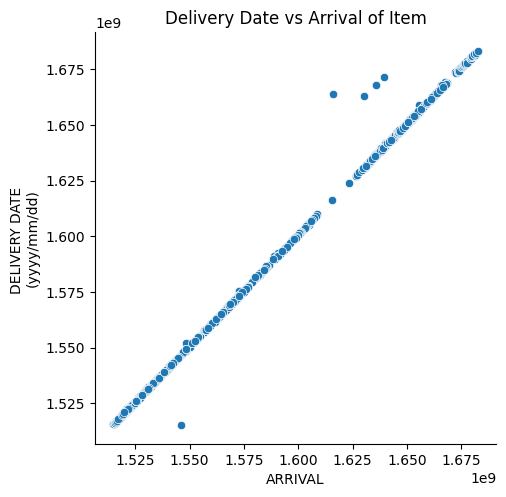

In [ ]:
plot = sns.relplot(x='ARRIVAL', y='DELIVERY DATE \n(yyyy/mm/dd)',data=data)
plot.set(title='Delivery Date vs Arrival of Item')

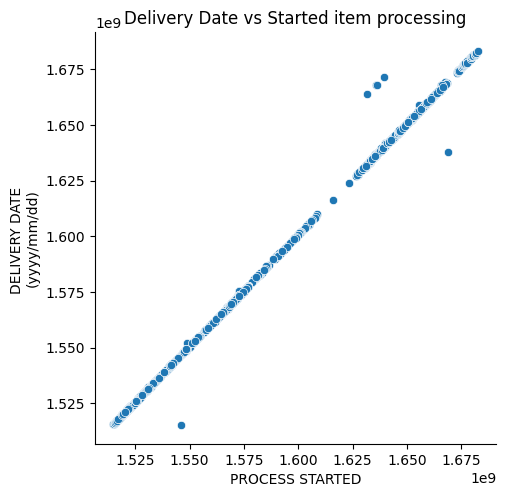

In [ ]:
plot = sns.relplot(y='DELIVERY DATE \n(yyyy/mm/dd)', x='PROCESS STARTED',data=data)
plot.set(title='Delivery Date vs Started item processing')

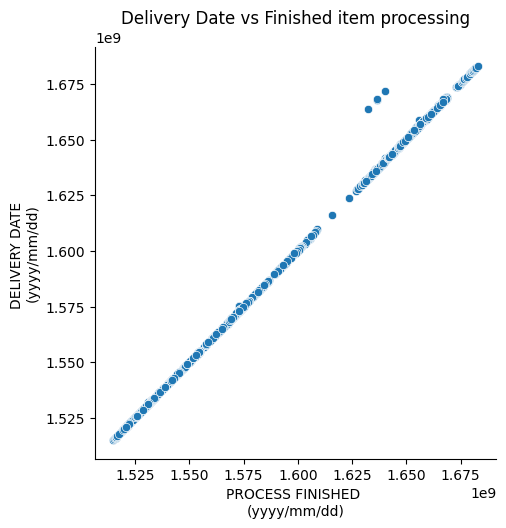

In [ ]:
plot = sns.relplot(y='DELIVERY DATE \n(yyyy/mm/dd)', x='PROCESS FINISHED \n(yyyy/mm/dd)',data=data)
plot.set(title='Delivery Date vs Finished item processing')

In [ ]:

X =  data[["ARRIVAL", "PROCESS STARTED", "PROCESS FINISHED \n(yyyy/mm/dd)"]]
y = data["DELIVERY DATE \n(yyyy/mm/dd)"]

# shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# feature selection
selector = SelectKBest(score_func=f_regression, k=3)
X = selector.fit_transform(X, y)

# data normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Hyperparameter tuning

In [ ]:
# model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}

In [ ]:
params = {
    "Linear Regression": {},
    "Ridge Regression": {"alpha": [0.1, 1.0, 10.0], "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg"]},
    "Lasso Regression": {"alpha": [0.1, 1.0, 10.0], "selection": ["cyclic", "random"]},
    "Random Forest Regression": {"n_estimators": [100, 500, 1000], "max_depth": [10, 50, None], "min_samples_split": [2, 5, 10]},
    "Gradient Boosting Regression": {"n_estimators": [100, 500, 1000], "max_depth": [10, 50, None], "learning_rate": [0.01, 0.1, 1.0]},
    "Support Vector Regression": {"C": [0.1, 1.0, 10.0], "epsilon": [0.01, 0.1, 1.0], "kernel": ["linear", "poly", "rbf", "sigmoid"]}
}


In [ ]:
best_model = None
best_score = float("-inf")

In [ ]:
for name, model in models.items():
    pipeline = model
    clf = GridSearchCV(pipeline, params[name], cv=5, scoring="r2")
    clf.fit(X, y)
    score = clf.best_score_
    if score > best_score:
        best_score = score
        best_model = clf.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+15, tolerance: 2.268e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+15, tolerance: 2.251e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.294e+15, tolerance: 2.268e

In [ ]:
# cross-validation
scores = []
kfolds = 5
for i in range(kfolds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    scores.append((mae, mse, rmse, r2))


In [ ]:
# print results
for i, (mae, mse, rmse, r2) in enumerate(scores):
    print(f"Fold {i+1} results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")
    print("="*30)

Fold 1 results:
MAE: 23801.92
MSE: 18400981420.12
RMSE: 135650.22
R2: 1.00
Fold 2 results:
MAE: 31603.85
MSE: 29530682840.24
RMSE: 171844.94
R2: 1.00
Fold 3 results:
MAE: 10332.69
MSE: 5419441065.09
RMSE: 73616.85
R2: 1.00
Fold 4 results:
MAE: 24475.00
MSE: 22106331479.29
RMSE: 148681.98
R2: 1.00
Fold 5 results:
MAE: 27644.23
MSE: 26583951834.32
RMSE: 163045.86
R2: 1.00


In [ ]:
# final model
print("Final Model:")
print(best_model)
print("Final Score:")
print(best_score)

Final Model:
GradientBoostingRegressor(learning_rate=1.0, max_depth=50, n_estimators=500)
Final Score:
0.9984052673654492


#Test training using tuned hyperparameter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
model = make_pipeline(StandardScaler(),LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)


In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("Training score:", train_score)
print("Testing score:", test_score)

MAE: 262979.03584044345
MSE: 634694921530.1427
RMSE: 796677.4262712247
R2: 0.9997848293997322
Training score: 0.9980674336223412
Testing score: 0.9997848293997322


In [ ]:
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

In [ ]:
print("MAE:", mae_best)
print("MSE:", mse_best)
print("RMSE:", rmse_best)
print("R2:", r2_best)
print("Training score:", train_score)
print("Testing score:", test_score)

MAE: 20526.92307692435
MSE: 10564321420.118395
RMSE: 102782.88485987535
R2: 0.9999964185448721
Training score: 0.9999936889508236
Testing score: 0.9999964185448721


#Model Validation

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=10)

In [ ]:
scores = cross_val_score(best_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
# calculate the mean and standard deviation of the scores
mean_score = -1 * scores.mean()
std_score = scores.std()

In [ ]:
# print the results
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 8744186642938.856
Standard deviation: 12084456987349.543


#Test Prediction

In [ ]:
new_shipment = pd.DataFrame({'ARRIVAL': ['2021-10-01'], 'PROCESS STARTED': ['2021-10-01'], 
                             'PROCESS FINISHED \n(yyyy/mm/dd)': ['2021-10-07']})

In [ ]:
new_shipment['ARRIVAL'] = pd.to_datetime(new_shipment['ARRIVAL'])
new_shipment['PROCESS STARTED'] = pd.to_datetime(new_shipment['PROCESS STARTED'])
new_shipment['PROCESS FINISHED \n(yyyy/mm/dd)'] = pd.to_datetime(new_shipment['PROCESS FINISHED \n(yyyy/mm/dd)'])


In [ ]:
new_shipment['ARRIVAL'] = new_shipment['ARRIVAL'].apply(lambda x: x.timestamp())
new_shipment['PROCESS STARTED'] = new_shipment['PROCESS STARTED'].apply(lambda x: x.timestamp())
new_shipment['PROCESS FINISHED \n(yyyy/mm/dd)'] = new_shipment['PROCESS FINISHED \n(yyyy/mm/dd)'].apply(lambda x: x.timestamp())


In [ ]:
new_shipment

,ARRIVAL,PROCESS STARTED,PROCESS FINISHED \n(yyyy/mm/dd)
0,1.633046e+09,1.633046e+09,1.633565e+09


#**DATA FOR TRAINING**

In [ ]:
X = new_shipment[['ARRIVAL', 'PROCESS STARTED', 'PROCESS FINISHED \n(yyyy/mm/dd)']]


X_new = selector.transform(X)
X_new = scaler.transform(X_new)
y_pred = model.predict(X_new)
y_pred[0]

1634158184.376963

In [ ]:
print("Best model prediction: ",  pd.to_datetime(y_pred[0], unit='s'))


Best model prediction:  2021-10-13 20:49:44.376962816


#Save Model

In [ ]:
dump(model, 'delivery_prediction.joblib')
dump(selector, "selector.joblib")
dump(scaler, "scaler.joblib")

['scaler.joblib']